<a href="https://colab.research.google.com/github/yangsr2/DHUM/blob/main/wallstreetbets_reddit_posts_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis preparation

We initialize the packages that we will use in the analysis.

Borrowed from https://www.kaggle.com/code/gpreda/wallstreetbets-reddit-posts-analysis, user 'GABRIEL PREDA'

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")

In [ ]:
posts = pd.read_csv("/content/reddit_wsb-2.csv")

In [ ]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "fuck", "fucking", "retard", "x200B", "shit", "Discussion", "Thread", "retards", "retarded", "Daily Discussion", "width", "format", "html"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

## Title

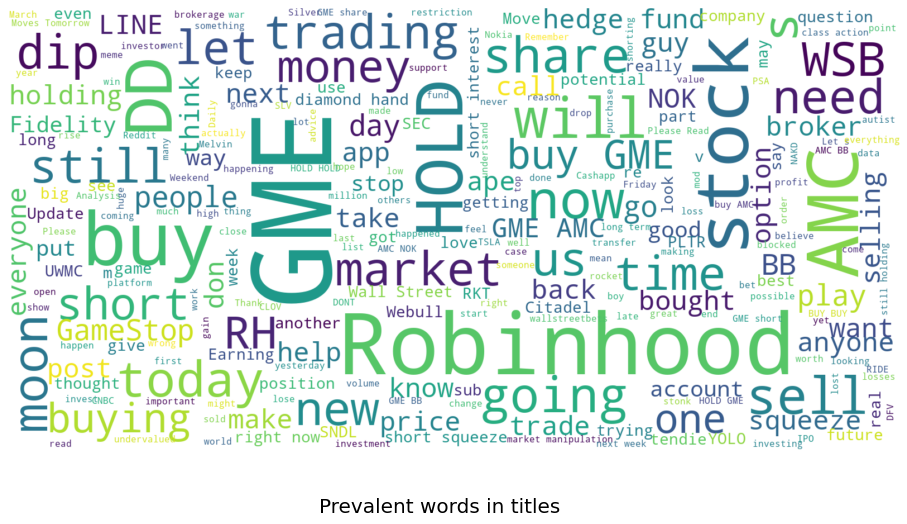

In [ ]:
show_wordcloud(posts['title'], title = 'Prevalent words in titles')

## Body

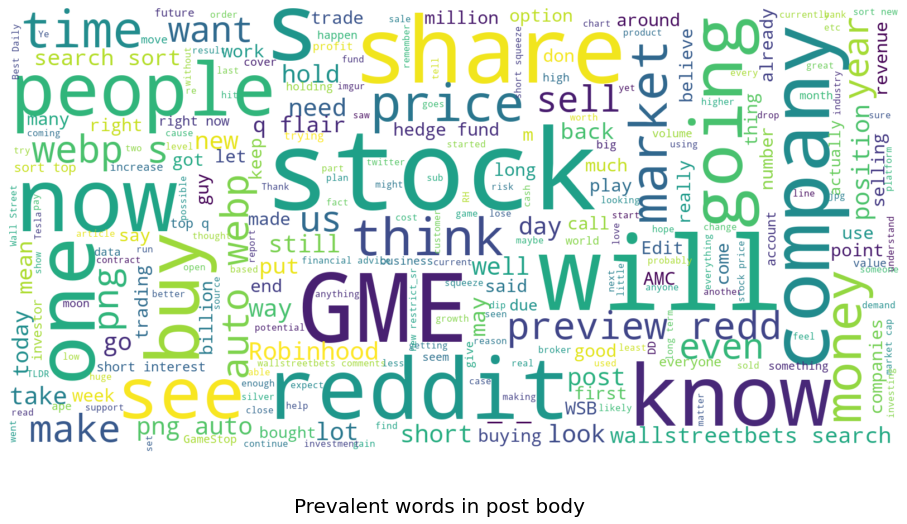

In [ ]:
show_wordcloud(posts['body'], title = 'Prevalent words in post body')

# Sentiment analysis

## With nltk SentimentIntensityAnalyzer

In [ ]:
# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"       

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()

    fig, (ax1)= plt.subplots(ncols=1, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    plt.title(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

### Title

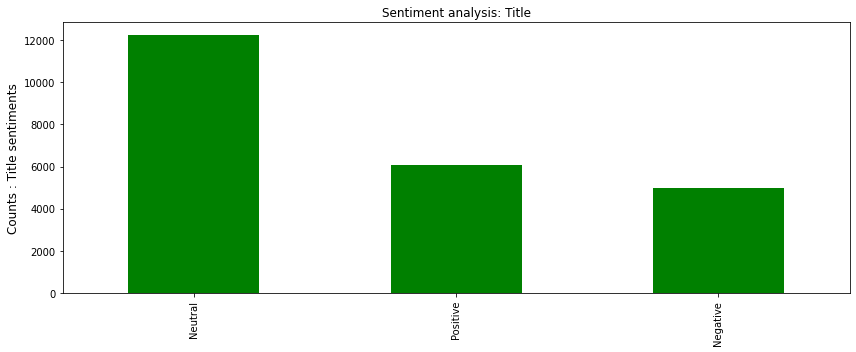

In [ ]:
posts['title_sentiment'] = posts['title'].apply(lambda x: find_sentiment(x))
plot_sentiment(posts, 'title_sentiment', 'Title')

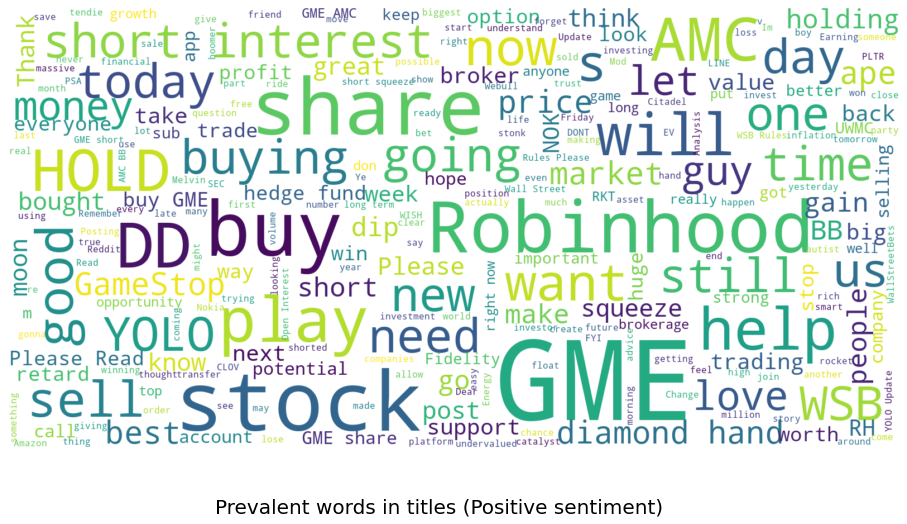

In [ ]:
show_wordcloud(posts.loc[posts['title_sentiment']=='Positive', 'title'], title = 'Prevalent words in titles (Positive sentiment)')

Title/Post Length

In [ ]:
posts.dropna(inplace=True)
posts['len']=posts['title'].apply(lambda x : len(x.split(' ')))
px.histogram(posts['len'],template='simple_white', range_x= (0, 50), title='Post Word Length',
             color_discrete_map={
                "len": "lightblue"
            },
             labels={
                "value": "Word Length"
            })


In [ ]:
posts['len']=posts['body'].apply(lambda x : len(x.split(' ')))
px.histogram(posts['len'],template='simple_white', range_x= (0, 500), title='Post Word Length', 
             color_discrete_map={
                "len": "LightGreen"
            },
             labels={
                "value": "Word Length"
            })
